# Import Libraries & Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
#Import dataset
path = 'C:\\Users\\User\\Desktop\\VSC\\DOMAIN\\collected_data.csv'
domain_data = pd.read_csv(path)
domain_data

,Name,SEO Score,Age of Domain,Search Queries Occurrences,Word Composition,Length Score,TLD Score,Price
0,mqfmq.com,0,0,576,40.00,100,100.00,368 USD
1,motherlodetraining.com,0,0,62,44.44,10,100.00,458 USD
2,mpgq.cn,0,0,59600,75.00,100,11.11,"2,470 USD"
3,mojs168.com,0,6,0,0.00,50,100.00,458 USD
4,monkeysswinginghammers.com,0,0,5,100.00,10,100.00,458 USD
...,...,...,...,...,...,...,...,...
6382,fleckney.com,0,10,608000,100.00,50,100.00,"2,895 USD"
6383,freist.com,0,8,413000,100.00,50,100.00,"1,895 USD"
6384,frubes.com,0,10,146000,83.33,50,100.00,"2,795 USD"
6385,frytki.com,0,12,14800000,50.00,50,100.00,"2,895 USD"


# Data Understanding & Preprocessing

- Data Type

In [8]:
#Identify variables and data types for dataset
domain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        6387 non-null   object 
 1   SEO Score                   6387 non-null   int64  
 2   Age of Domain               6387 non-null   int64  
 3   Search Queries Occurrences  6387 non-null   int64  
 4   Word Composition            6387 non-null   float64
 5   Length Score                6387 non-null   int64  
 6   TLD Score                   6387 non-null   float64
 7   Price                       6387 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 399.3+ KB


- Convert Price from object to float (Target Variable)

In [9]:
#Convert Price from object to float
domain_data['Price'] = domain_data['Price'].str.replace(' USD', '').str.replace(',', '').astype(float)

- Statistics

In [10]:
# Statistics for variables
domain_data.describe()

,SEO Score,Age of Domain,Search Queries Occurrences,Word Composition,Length Score,TLD Score,Price
count,6387.0,6387.000000,6.387000e+03,6387.000000,6387.000000,6387.000000,6.387000e+03
mean,0.0,7.181775,9.069432e+07,63.194207,53.901675,89.049756,2.984644e+03
std,0.0,6.811083,1.612407e+09,38.144163,19.010811,29.601874,2.258916e+04
min,0.0,0.000000,0.000000e+00,0.000000,10.000000,2.780000,7.900000e+01
25%,0.0,1.000000,1.245000e+04,33.330000,50.000000,100.000000,4.580000e+02
50%,0.0,6.000000,1.910000e+05,83.330000,50.000000,100.000000,2.395000e+03
75%,0.0,11.000000,2.470000e+06,100.000000,50.000000,100.000000,3.575000e+03
max,0.0,30.000000,5.165000e+10,100.000000,100.000000,100.000000,1.180803e+06


- Age of Domain

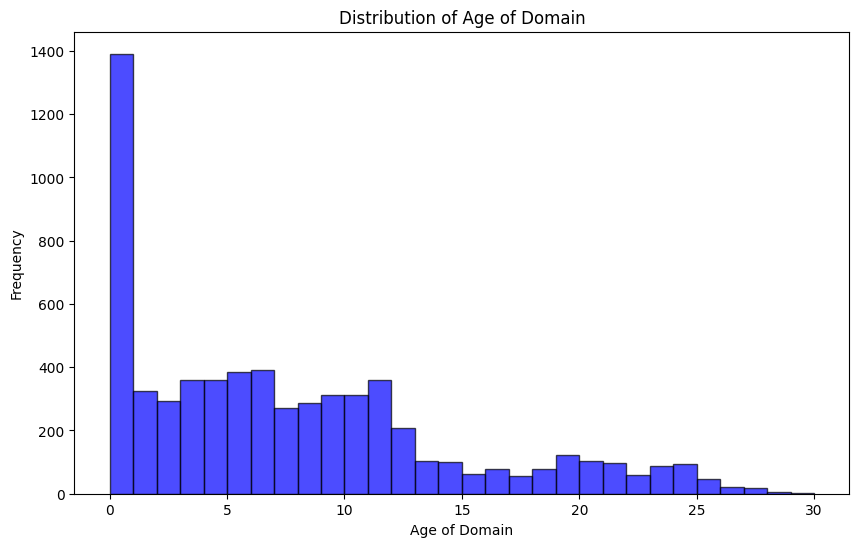

In [11]:
# Create histograms for Age of Domain
plt.figure(figsize=(10, 6))
plt.hist(domain_data['Age of Domain'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age of Domain')
plt.xlabel('Age of Domain')
plt.ylabel('Frequency')
plt.show()

Search Queries Occurrences

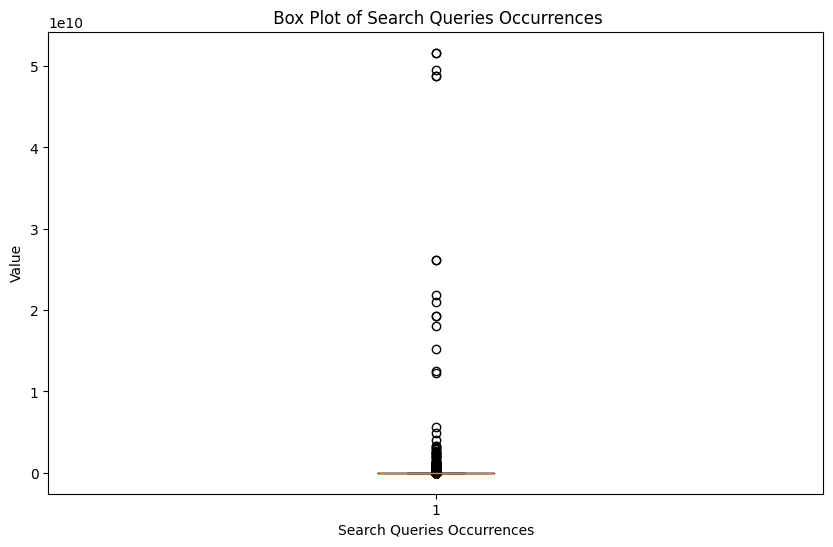

In [12]:
# Create box plot for Search Queries Occurrences
plt.figure(figsize=(10, 6))
plt.boxplot( domain_data['Search Queries Occurrences']) 
plt.title(' Box Plot of Search Queries Occurrences')
plt.xlabel('Search Queries Occurrences')  
plt.ylabel('Value')  
plt.show()

Word Composition

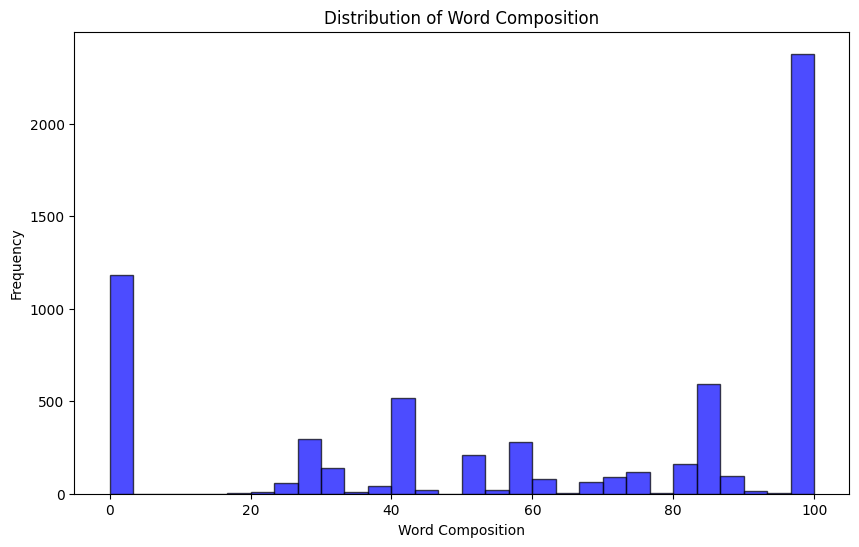

In [13]:
# Create histograms for Word Composition
plt.figure(figsize=(10, 6))
plt.hist(domain_data['Word Composition'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Composition')
plt.xlabel('Word Composition')
plt.ylabel('Frequency')
plt.show()

Length Score

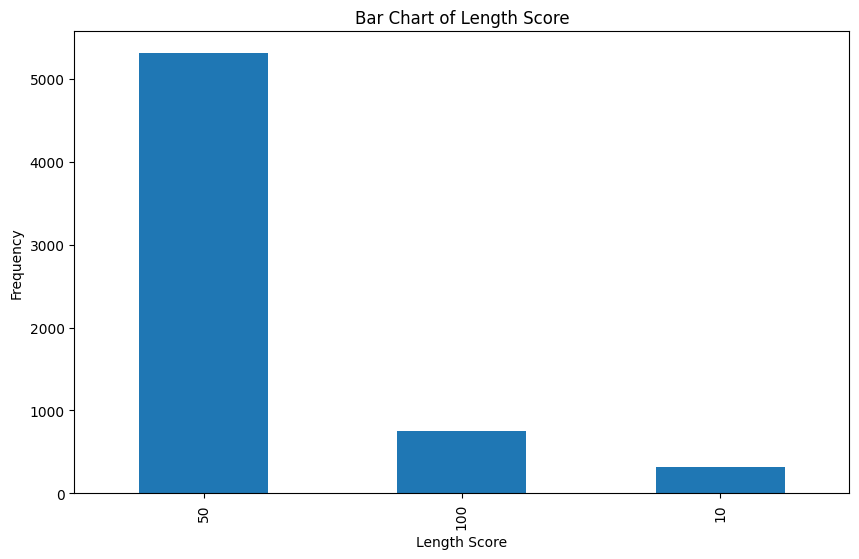

In [14]:
# Create bar chart for Length Score
plt.figure(figsize=(10, 6))
domain_data['Length Score'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Length Score')
plt.xlabel('Length Score')
plt.ylabel('Frequency')
plt.show()

TLD Score

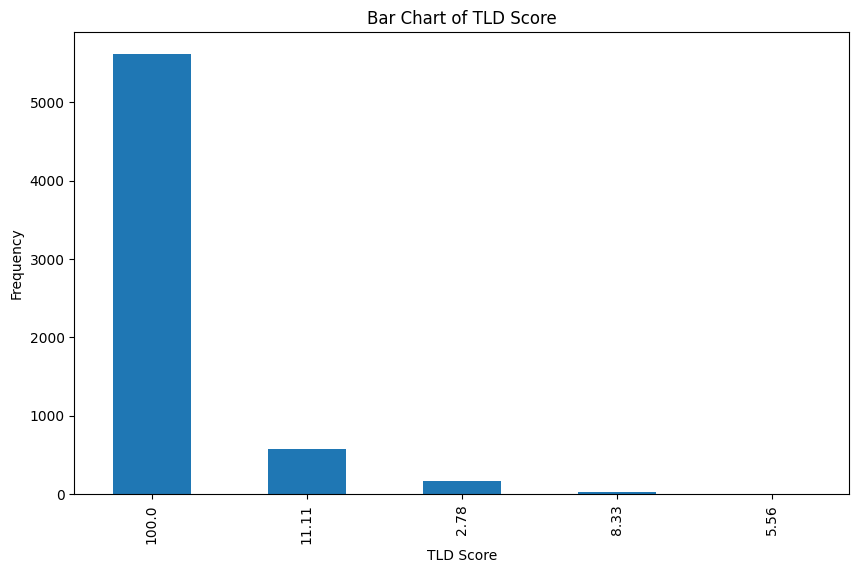

In [15]:
# Create bar chart for TLD Score
plt.figure(figsize=(10, 6))
domain_data['TLD Score'].value_counts().plot(kind='bar')
plt.title('Bar Chart of TLD Score')
plt.xlabel('TLD Score')
plt.ylabel('Frequency')
plt.show()

- Drop SEO Score

In [16]:
#Drop SEO Score
domain_data = domain_data.drop('SEO Score', axis=1)
domain_data

,Name,Age of Domain,Search Queries Occurrences,Word Composition,Length Score,TLD Score,Price
0,mqfmq.com,0,576,40.00,100,100.00,368.0
1,motherlodetraining.com,0,62,44.44,10,100.00,458.0
2,mpgq.cn,0,59600,75.00,100,11.11,2470.0
3,mojs168.com,6,0,0.00,50,100.00,458.0
4,monkeysswinginghammers.com,0,5,100.00,10,100.00,458.0
...,...,...,...,...,...,...,...
6382,fleckney.com,10,608000,100.00,50,100.00,2895.0
6383,freist.com,8,413000,100.00,50,100.00,1895.0
6384,frubes.com,10,146000,83.33,50,100.00,2795.0
6385,frytki.com,12,14800000,50.00,50,100.00,2895.0


- Check Missing Data

In [17]:
# Check missing values
missing_data = domain_data.isnull().sum()
print("Missing Values For Each Column")
print(missing_data)

Missing Values For Each Column
Name                          0
Age of Domain                 0
Search Queries Occurrences    0
Word Composition              0
Length Score                  0
TLD Score                     0
Price                         0
dtype: int64


- Check & Drop Duplicated Data

In [18]:
# Check duplicated rows based on the specified column (Name)
column_to_drop_duplicates = 'Name'
duplicated_data = domain_data.duplicated(subset=[column_to_drop_duplicates]).sum()
print(f"Number of duplicated rows: {duplicated_data}")

Number of duplicated rows: 1162


In [19]:
#Drop duplicated rows based on the specified column (Name)
domain_data = domain_data.drop_duplicates(subset=[column_to_drop_duplicates])

# Print total rows after dropping duplicated data
total_rows = len(domain_data)
print(f"Dropped Duplicated Data")
print(f"Current total rows in domain_data: {total_rows}")

Dropped Duplicated Data
Current total rows in domain_data: 5225


- Check & Drop Outlier Data 

In [20]:
# Check outliers data for 'Price'Column
# Calculate z-scores
column_to_check = 'Price'
z_scores = np.abs((domain_data[column_to_check] - domain_data[column_to_check].mean()) / domain_data[column_to_check].std())

# Filter outliers based on z-score threshold 
outliers_zscore = domain_data[z_scores > 3]

# Print outliers along with their z-scores
print("Outliers identified using Z-Score (Price):")
for index, row in outliers_zscore.iterrows():
    print("Row Index:", index, "- Price:", row[column_to_check], "- Z-Score:", z_scores[index])


Outliers identified using Z-Score (Price):
Row Index: 584 - Price: 1180803.0 - Z-Score: 47.413309308853414
Row Index: 666 - Price: 472321.0 - Z-Score: 18.887462356930932
Row Index: 671 - Price: 1180803.0 - Z-Score: 47.413309308853414
Row Index: 683 - Price: 354241.0 - Z-Score: 14.133167952721642
Row Index: 726 - Price: 236160.0 - Z-Score: 9.378833285178981
Row Index: 1157 - Price: 141696.0 - Z-Score: 5.575397761811549


In [21]:
# Drop outliers from the original DataFrame
domain_data = domain_data.drop(outliers_zscore.index)

# Print total rows after dropping outliers (Price)
total_rows = len(domain_data)
print(f"Dropped Outlier Data (Price)")
print(f"Current total rows in domain_data: {total_rows}")

Dropped Outlier Data (Price)
Current total rows in domain_data: 5219


In [22]:
# Check outliers data for 'Age of Domain' column
# Calculate z-scores
column_to_check = 'Age of Domain'
z_scores = np.abs((domain_data[column_to_check] - domain_data[column_to_check].mean()) / domain_data[column_to_check].std())

# Filter outliers based on z-score threshold 
outliers_zscore = domain_data[z_scores > 3]

# Print outliers along with their z-scores
print("Outliers identified using Z-Score (Age of Domain):")
for index, row in outliers_zscore.iterrows():
    print("Row Index:", index, "- Age of Domain:", row[column_to_check], "- Z-Score:", z_scores[index])



Outliers identified using Z-Score (Age of Domain):
Row Index: 71 - Age of Domain: 30 - Z-Score: 3.2234885975884264


In [23]:
# Drop outliers of Age of Domain from the original DataFrame
domain_data = domain_data.drop(outliers_zscore.index)

# Print total rows after dropping outliers (Age of Domain)
total_rows = len(domain_data)
print(f"Dropped Outlier Data (Age of Domain)")
print(f"Current total rows in domain_data: {total_rows}")

Dropped Outlier Data (Age of Domain)
Current total rows in domain_data: 5218


In [24]:
# Check outliers data for 'Search Queries Occurrences' column
# Calculate z-scores
column_to_check = 'Search Queries Occurrences'
z_scores = np.abs((domain_data[column_to_check] - domain_data[column_to_check].mean()) / domain_data[column_to_check].std())

# Filter outliers based on z-score threshold 
outliers_zscore = domain_data[z_scores > 3]

# Print outliers along with their z-scores
print("Outliers identified using Z-Score (Search Queries Occurrences):")
for index, row in outliers_zscore.iterrows():
    print("Row Index:", index, "- Search Queries Occurrences:", row[column_to_check], "- Z-Score:", z_scores[index])

Outliers identified using Z-Score (Search Queries Occurrences):
Row Index: 347 - Search Queries Occurrences: 21030000000 - Z-Score: 14.76556173996802
Row Index: 953 - Search Queries Occurrences: 48740000000 - Z-Score: 34.295507557649444
Row Index: 1055 - Search Queries Occurrences: 26160000000 - Z-Score: 18.38117422804834
Row Index: 2289 - Search Queries Occurrences: 51650000000 - Z-Score: 36.34646902749618
Row Index: 2301 - Search Queries Occurrences: 19230000000 - Z-Score: 13.496925779238083
Row Index: 2932 - Search Queries Occurrences: 15180000000 - Z-Score: 10.642494867595722
Row Index: 3772 - Search Queries Occurrences: 5650000000 - Z-Score: 3.925772253286664
Row Index: 3793 - Search Queries Occurrences: 4910000000 - Z-Score: 3.4042219138754675
Row Index: 5279 - Search Queries Occurrences: 18070000000 - Z-Score: 12.679360382323233
Row Index: 5306 - Search Queries Occurrences: 21900000000 - Z-Score: 15.378735787654156
Row Index: 5472 - Search Queries Occurrences: 49500000000 - Z-Sc

In [25]:
# Drop outliers of Search Queries Occurrences from the original DataFrame
domain_data = domain_data.drop(outliers_zscore.index)

# Print total rows after dropping outliers (Search Queries Occurrences)
total_rows = len(domain_data)
print(f"Dropped Outlier Data (Search Queries Occurrences)")
print(f"Current total rows in domain_data: {total_rows}")

Dropped Outlier Data (Search Queries Occurrences)
Current total rows in domain_data: 5205


- Price (Log Transformation)

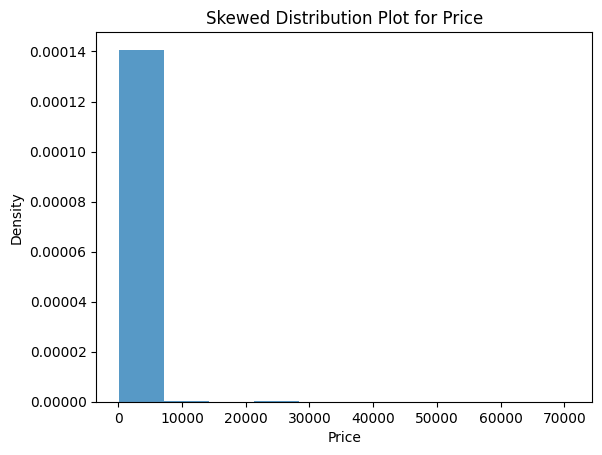

In [26]:
# Create skewed distribution plot for price
plt.hist(domain_data['Price'], bins=10, density=True, alpha=0.75)
plt.title('Skewed Distribution Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [27]:
# Perform log transformation on 'Price' column 
domain_data['Log_Price'] = np.log1p(domain_data['Price'])
domain_data.head()

,Name,Age of Domain,Search Queries Occurrences,Word Composition,Length Score,TLD Score,Price,Log_Price
0,mqfmq.com,0,576,40.00,100,100.00,368.0,5.910797
1,motherlodetraining.com,0,62,44.44,10,100.00,458.0,6.129050
2,mpgq.cn,0,59600,75.00,100,11.11,2470.0,7.812378
3,mojs168.com,6,0,0.00,50,100.00,458.0,6.129050
4,monkeysswinginghammers.com,0,5,100.00,10,100.00,458.0,6.129050


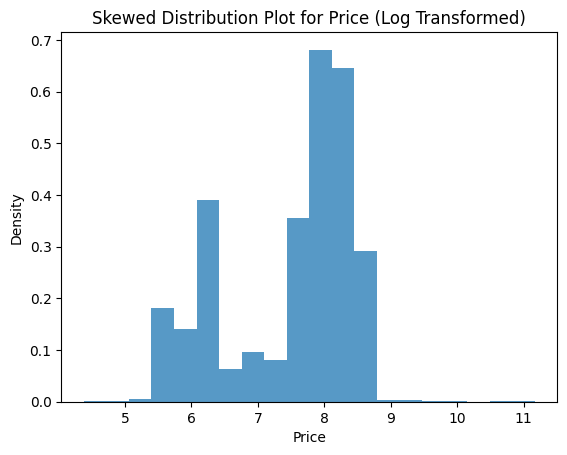

In [28]:
# Create skewed distribution plot for Price after log transformation 
plt.hist(domain_data['Log_Price'], bins=20, density=True, alpha=0.75)
plt.title('Skewed Distribution Plot for Price (Log Transformed)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [29]:
# Display the features (columns) of the domain_data
features = domain_data.columns.tolist()
print("Features (Columns) of domain_data:")
for feature in features:
    print(feature)

Features (Columns) of domain_data:
Name
Age of Domain
Search Queries Occurrences
Word Composition
Length Score
TLD Score
Price
Log_Price


- Data Splitting


In [30]:
# Dropping columns 'Name', 'Price', and 'Log_Price' from the DataFrame to get feature matrix X
X = domain_data.drop(['Name', 'Price', 'Log_Price'], axis=1)
# Selecting the target variable 'Log_Price' as the response vector y
y = domain_data['Log_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import Libraries for Modeling 

In [31]:
#Selected model
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

#Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

#Cross validation
from sklearn.model_selection import cross_val_score

#Tabulate results
from tabulate import tabulate



# Baseline Model

In [32]:
# Baseline Model
# Calculate the mean of the log-transformed prices
mean_log_price = np.mean(y_train)

# Predict the mean for all instances in the test set
mean_predictions = np.full(shape=y_test.shape, fill_value=mean_log_price)

# Convert mean predictions back to original price scale
mean_predictions_original = np.exp(mean_predictions)

# Calculate MAE and MSE for the baseline model on log-transformed scale
baseline_mae_log = mean_absolute_error(y_test, mean_predictions)
baseline_mse_log = mean_squared_error(y_test, mean_predictions)
baseline_rmse_log = np.sqrt(baseline_mse_log)

# Calculate MAE and MSE for the baseline model on the original price scale
baseline_mae_original = mean_absolute_error(np.exp(y_test), mean_predictions_original)
baseline_mse_original = mean_squared_error(np.exp(y_test), mean_predictions_original)
baseline_rmse_original = np.sqrt(baseline_mse_original)

baseline_mae_log = "{:.4f}".format(baseline_mae_log)
baseline_rmse_log = "{:.4f}".format(baseline_rmse_log)
baseline_mae_original = "{:.4f}".format(baseline_mae_original)
baseline_rmse_original = "{:.4f}".format(baseline_rmse_original)

print(f"Baseline MAE on log-transformed scale: {baseline_mae_log}")
print(f"Baseline RMSE on log-transformed scale: {baseline_rmse_log}")

print(f"Baseline MAE on original price scale: {baseline_mae_original}")
print(f"Baseline RMSE on original price scale: {baseline_rmse_original}")

Baseline MAE on log-transformed scale: 0.8408
Baseline RMSE on log-transformed scale: 0.9896
Baseline MAE on original price scale: 1563.5577
Baseline RMSE on original price scale: 2406.5286


# Modeling

 **XGBoost**
---

In [33]:
# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mae_log_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_xgb = np.exp(y_pred_xgb)

# Calculate MAE and MSE on the original scale
mae_original_xgb = mean_absolute_error(y_test_original, y_pred_original_xgb) 
rmse_original_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_original_xgb))  

# Format the metrics to 4 decimal places
mae_log_xgb = "{:.4f}".format(mae_log_xgb)
rmse_log_xgb = "{:.4f}".format(rmse_log_xgb)
mae_original_xgb = "{:.4f}".format(mae_original_xgb)
rmse_original_xgb = "{:.4f}".format(rmse_original_xgb)
r2_xgb = "{:.4f}".format(r2_xgb)

# Print the results
print("Log Scale")
print(f"MAE: {mae_log_xgb}")
print(f"RMSE: {rmse_log_xgb}")
print("Original Scale")
print(f"MAE: {mae_original_xgb}")
print(f"RMSE: {rmse_original_xgb}")
print(f"R^2: {r2_xgb}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4855
RMSE: 0.7031
Original Scale
MAE: 1083.6812
RMSE: 2205.5566
R^2: 0.4947


- Hyperparameter Tuning

In [34]:
# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [ 0.03, 0.04, 0.05, 0.06],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [ 0.6, 0.7, 0.75, 0.8, 0.85]
}
# Initialize GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid_xgb,
                           scoring='neg_mean_absolute_error', 
                           cv=3, 
                           verbose=1,
                           n_jobs=-1)

# Perform the grid search and fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_
best_score_xgb = -grid_search_xgb.best_score_

# Print the results
print(f"Best parameters: {best_params_xgb}")
print(f"Best score (MAE): {best_score_xgb}")

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.7}
Best score (MAE): 0.4442403179988699


In [35]:
# Use the best estimator to make predictions on the test set
best_y_pred_xgb = best_estimator_xgb.predict(X_test)

# Evaluate the best model on the test set
best_mae_log_xgb = mean_absolute_error(y_test, best_y_pred_xgb)
best_rmse_log_xgb = np.sqrt(mean_squared_error(y_test, best_y_pred_xgb))
best_r2_xgb = r2_score(y_test, best_y_pred_xgb)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_xgb = np.exp(best_y_pred_xgb)

# Calculate MAE and MSE on the original scale
best_mae_original_xgb = mean_absolute_error(y_test_original, y_pred_original_xgb)
best_rmse_original_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_original_xgb))  # Root Mean Squared Error

# Format the metrics to 4 decimal places
best_mae_log_xgb = "{:.4f}".format(best_mae_log_xgb)
best_rmse_log_xgb = "{:.4f}".format(best_rmse_log_xgb)
best_mae_original_xgb = "{:.4f}".format(best_mae_original_xgb)
best_rmse_original_xgb = "{:.4f}".format(best_rmse_original_xgb)
best_r2_xgb = "{:.4f}".format(best_r2_xgb)

# Print the results
print("Log Scale")
print(f"MAE: {best_mae_log_xgb}")
print(f"RMSE: {best_rmse_log_xgb}")
print("Original Scale")
print(f"MAE: {best_mae_original_xgb}")
print(f"RMSE: {best_rmse_original_xgb}")
print(f"R^2: {best_r2_xgb}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4474
RMSE: 0.6406
Original Scale
MAE: 1000.6725
RMSE: 2133.3386
R^2: 0.5805


- Compariosn Table

In [37]:
#Table 1: Comparison Table
comparison_table_xgb = [
    ['XGBoost (Base Model)', mae_log_xgb, rmse_log_xgb, mae_original_xgb, rmse_original_xgb,r2_xgb],
    ['XGBoost (Tuned Model)', best_mae_log_xgb, best_rmse_log_xgb, best_mae_original_xgb, best_rmse_original_xgb, best_r2_xgb ]
]

headers_table_xgb = ['Model', 'MAE (Log Scale)', 'RMSE (Log Scale)', 'MAE (Original Scale)', 'RMSE (Original Scale)', 'R^2']
colalign = ['center'] * len(headers_table_xgb)
print("Table 1: XGBoost Model Performance")
print(tabulate(comparison_table_xgb, headers=headers_table_xgb, tablefmt="grid", colalign=colalign))

Table 1: XGBoost Model Performance
+-----------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|         Model         |  MAE (Log Scale)  |  RMSE (Log Scale)  |  MAE (Original Scale)  |  RMSE (Original Scale)  |  R^2   |
+=======================+===================+====================+========================+=========================+========+
| XGBoost (Base Model)  |      0.4855       |       0.7031       |        1083.68         |         2205.56         | 0.4947 |
+-----------------------+-------------------+--------------------+------------------------+-------------------------+--------+
| XGBoost (Tuned Model) |      0.4474       |       0.6406       |        1000.67         |         2133.34         | 0.5805 |
+-----------------------+-------------------+--------------------+------------------------+-------------------------+--------+


- K-Fold Cross Validation

In [38]:
# Initialize XGBoost with the best parameters
best_xgb_model = best_estimator_xgb

# Perform k-fold cross-validation
cv_mae_scores_xgb = cross_val_score(best_xgb_model, X, y, scoring='neg_mean_absolute_error', cv=5)

# Convert scores to positive MAE scores
cv_mae_scores_xgb = -cv_mae_scores_xgb

# Calculate mean and standard deviation of the scores
mean_cv_mae_xgb = cv_mae_scores_xgb.mean()
std_cv_mae_xgb = cv_mae_scores_xgb.std()

# Format the metrics to 4 decimal places
mean_cv_mae_xgb = "{:.4f}".format(mean_cv_mae_xgb)
std_cv_mae_xgb = "{:.4f}".format(std_cv_mae_xgb)

# Print the results
print(f"K-Fold Cross-Validation MAE Scores: {cv_mae_scores_xgb}")
print(f"Mean K-Fold CV MAE: {mean_cv_mae_xgb}")
print(f'Standard Deviation of CV MAE: {std_cv_mae_xgb}')

K-Fold Cross-Validation MAE Scores: [0.64307894 0.44873063 0.40159087 0.4232782  0.45749015]
Mean K-Fold CV MAE: 0.4748
Standard Deviation of CV MAE: 0.0864


- Features Importance

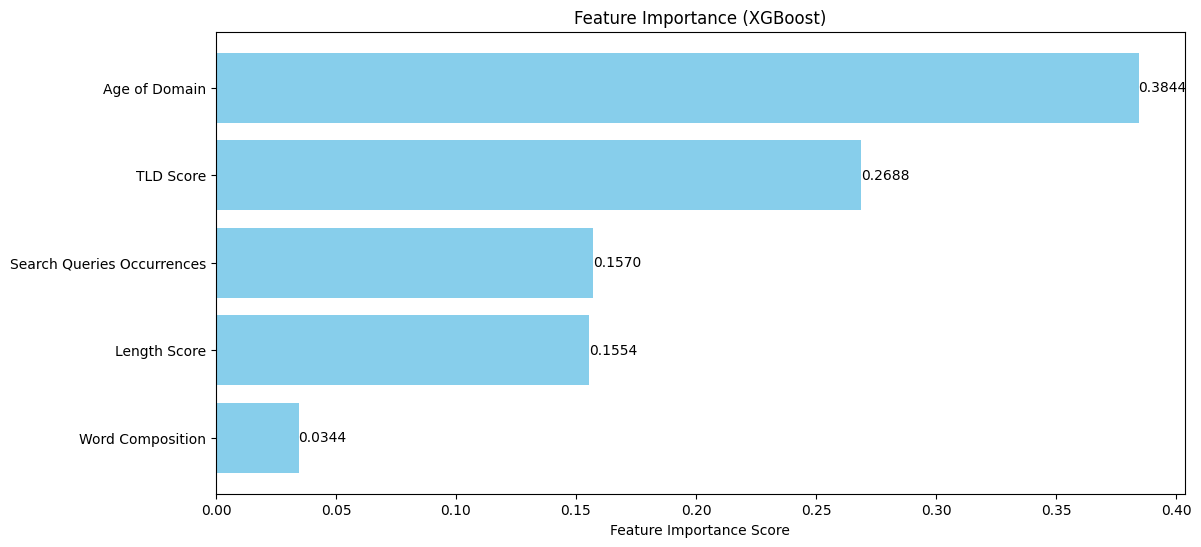

In [39]:
# Retrieve feature importance from the trained XGBoost model
feature_importances = best_estimator_xgb.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# Extract feature names and importance scores
features = [feature for feature, importance in sorted_features]
importance_scores = [importance for feature, importance in sorted_features]

# Create a horizontal bar chart
plt.figure(figsize=(12.5, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance (XGBoost)')

# Add labels with scores on the bars
for index, value in enumerate(importance_scores):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.show()

**GradientBoosting**
---

In [40]:
# Initialize the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train the model 
gradient_boosting_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_gd = gradient_boosting_model.predict(X_test)

# Evaluate the model's performance
mae_log_gd = mean_absolute_error(y_test, y_pred_gd)
rmse_log_gd = np.sqrt(mean_squared_error(y_test, y_pred_gd))
r2_gd = r2_score(y_test, y_pred_gd)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_gd = np.exp(y_pred_gd)

# Calculate MAE and MSE on the original scale
mae_original_gd = mean_absolute_error(y_test_original, y_pred_original_gd)
rmse_original_gd = np.sqrt(mean_squared_error(y_test_original, y_pred_original_gd))  # Root Mean Squared Error

# Format the metrics to 4 decimal places
mae_log_gd = "{:.4f}".format(mae_log_gd)
rmse_log_gd = "{:.4f}".format(rmse_log_gd)
mae_original_gd = "{:.4f}".format(mae_original_gd)
rmse_original_gd = "{:.4f}".format(rmse_original_gd)
r2_gd = "{:.4f}".format(r2_gd)

# Print the results
print("Log Scale")
print(f"MAE: {mae_log_gd}")
print(f"RMSE: {rmse_log_gd}")
print("Original Scale")
print(f"MAE: {mae_original_gd}")
print(f"RMSE: {rmse_original_gd}")
print(f"R^2: {r2_gd}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4521
RMSE: 0.6516
Original Scale
MAE: 1003.0757
RMSE: 2137.5464
R^2: 0.5659


- Hyperparameter Tuning


In [41]:
# Define the parameter grid to search
param_grid_gd = {
    'n_estimators': [ 200, 250, 300, 350],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.02, 0.03, 0.04],
    'subsample': [ 0.8, 0.9, 1.0],
}

# Initialize the GridSearchCV object
grid_search_gd = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gd,
                              scoring='neg_mean_absolute_error',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)

# Perform the grid search and fit the model
grid_search_gd.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params_gd = grid_search_gd.best_params_
best_estimator_gd = grid_search_gd.best_estimator_
best_score_gd = -grid_search_gd.best_score_  

# Print the results
print(f"Best parameters: {best_params_gd}")
print(f"Best MAE score: {best_score_gd}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Best MAE score: 0.439071982983181


In [42]:
# Use the best estimator to make predictions on the test set
best_y_pred_gd = best_estimator_gd.predict(X_test)

# Evaluate the best model on the test set
best_mae_log_gd = mean_absolute_error(y_test, best_y_pred_gd)
best_rmse_log_gd = np.sqrt(mean_squared_error(y_test, best_y_pred_gd))
best_r2_gd = r2_score(y_test, best_y_pred_gd)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_gd = np.exp(best_y_pred_gd)

# Calculate MAE and MSE on the original scale
best_mae_original_gd = mean_absolute_error(y_test_original, y_pred_original_gd)
best_rmse_original_gd = np.sqrt(mean_squared_error(y_test_original, y_pred_original_gd))  # Root Mean Squared Error

# Format the metrics to 4 decimal places
best_mae_log_gd = "{:.4f}".format(best_mae_log_gd)
best_rmse_log_gd = "{:.4f}".format(best_rmse_log_gd)
best_mae_original_gd = "{:.4f}".format(best_mae_original_gd)
best_rmse_original_gd = "{:.4f}".format(best_rmse_original_gd)
best_r2_gd = "{:.4f}".format(best_r2_gd)

# Print the results
print("Log Scale")
print(f"MAE: {best_mae_log_gd}")
print(f"RMSE: {best_rmse_log_gd}")
print("Original Scale")
print(f"MAE: {best_mae_original_gd}")
print(f"RMSE: {best_rmse_original_gd}")
print(f"R^2: {best_r2_gd}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4447
RMSE: 0.6507
Original Scale
MAE: 996.9127
RMSE: 2138.5393
R^2: 0.5672


- Comparison Table

In [44]:
#Table 2: Comparison Table
comparison_table_gd = [
    ['Gradient Boosting (Base Model)', mae_log_gd, rmse_log_gd, mae_original_gd, rmse_original_gd,r2_gd],
    ['Gradient Boosting (Tuned Model)', best_mae_log_gd, best_rmse_log_gd, best_mae_original_gd, best_rmse_original_gd, best_r2_gd ]
]

headers_table_gd = ['Model', 'MAE (Log Scale)', 'RMSE (Log Scale)', 'MAE (Original Scale)', 'RMSE (Original Scale)', 'R^2']
colalign = ['center'] * len(headers_table_gd)
print("Table 2: Gradient Boosting Model Performance")
print(tabulate(comparison_table_gd, headers=headers_table_gd, tablefmt="grid", colalign=colalign))

Table 2: Gradient Boosting Model Performance
+---------------------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|              Model              |  MAE (Log Scale)  |  RMSE (Log Scale)  |  MAE (Original Scale)  |  RMSE (Original Scale)  |  R^2   |
+=================================+===================+====================+========================+=========================+========+
| Gradient Boosting (Base Model)  |      0.4521       |       0.6516       |        1003.08         |         2137.55         | 0.5659 |
+---------------------------------+-------------------+--------------------+------------------------+-------------------------+--------+
| Gradient Boosting (Tuned Model) |      0.4447       |       0.6507       |        996.913         |         2138.54         | 0.5672 |
+---------------------------------+-------------------+--------------------+------------------------+-------------------------+------

- K-Fold Cross Validation

In [45]:
# Initialize Gradient Boosting with the best parameters
best_gd_model = best_estimator_gd

# Perform k-fold cross-validation
cv_results_gd = cross_val_score(best_gd_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert the results to positive MAE scores
cv_mae_scores_gd = -cv_results_gd

# Calculate the average and standard deviation of the MAE scores
mean_cv_mae_gd = cv_mae_scores_gd.mean()
std_cv_mae_gd = cv_mae_scores_gd.std()

# Format the metrics to 4 decimal places
mean_cv_mae_gd = "{:.4f}".format(mean_cv_mae_gd)
std_cv_mae_gd = "{:.4f}".format(std_cv_mae_gd)

# Print the results
print(f'K-Fold Cross-Validation MAE Scores: {cv_mae_scores_gd}')
print(f'Average CV MAE: {mean_cv_mae_gd}')
print(f'Standard Deviation of CV MAE: {std_cv_mae_gd}')

K-Fold Cross-Validation MAE Scores: [0.63339288 0.45089838 0.40205667 0.42366149 0.48173632]
Average CV MAE: 0.4783
Standard Deviation of CV MAE: 0.0820


- Features Importance

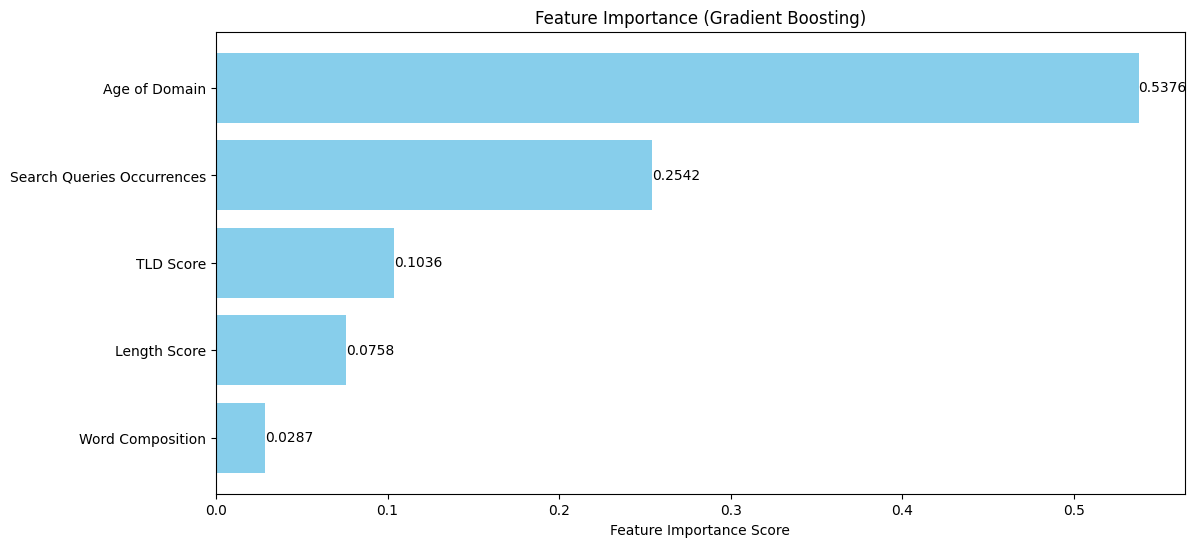

In [46]:
# Retrieve feature importance from the trained Gradient Boosting model
feature_importances = best_estimator_gd.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance 
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# Extract feature names and importance scores
features = [feature for feature, importance in sorted_features]
importance_scores = [importance for feature, importance in sorted_features]

# Create a horizontal bar chart
plt.figure(figsize=(12.5, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance (Gradient Boosting)')

# Add labels with scores on the bars
for index, value in enumerate(importance_scores):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.show()

**Random Forest**
---

In [47]:
# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model 
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
mae_log_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_log_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_rf = np.exp(y_pred_rf)

# Calculate MAE and MSE on the original scale
mae_original_rf = mean_absolute_error(y_test_original, y_pred_original_rf)
rmse_original_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_original_rf)) 

# Format the metrics to 4 decimal places
mae_log_rf = "{:.4f}".format(mae_log_rf)
rmse_log_rf = "{:.4f}".format(rmse_log_rf)
mae_original_rf = "{:.4f}".format(mae_original_rf)
rmse_original_rf = "{:.4f}".format(rmse_original_rf)
r2_rf = "{:.4f}".format(r2_rf)

# Print the results
print("Log Scale")
print(f"MAE: {mae_log_rf}")
print(f"RMSE: {rmse_log_rf}")
print("Original Scale")
print(f"MAE: {mae_original_rf}")
print(f"RMSE: {rmse_original_rf}")
print(f"R^2: {r2_rf}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4797
RMSE: 0.6941
Original Scale
MAE: 1070.2446
RMSE: 2192.0086
R^2: 0.5075


- Hyperparameter tuning 

In [48]:
# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the parameter grid
grid_search_rf = GridSearchCV(estimator= RandomForestRegressor(random_state=42), param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# Fit GridSearchCV on your training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best score from GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_  # Convert to positive MAE score
best_estimator_rf = grid_search_rf.best_estimator_

# Print the best parameters and score
print(f"Best parameters: {best_params_rf}")
print(f"Best Score (MAE): {best_score_rf}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score (MAE): 0.43811182908686075


In [49]:
# Using the best model from GridSearchCV to make predictions on the test set
best_y_pred_rf = best_estimator_rf.predict(X_test)

# Evaluate the best model on the test set
best_mae_log_rf = mean_absolute_error(y_test, best_y_pred_rf)
best_rmse_log_rf = np.sqrt(mean_squared_error(y_test, best_y_pred_rf))
best_r2_rf = r2_score(y_test, best_y_pred_rf)

# Revert predictions & true target values from log scale to original price scale for evaluation
y_test_original = np.exp(y_test)
y_pred_original_rf = np.exp(best_y_pred_rf)

# Calculate MAE and MSE on the original scale
best_mae_original_rf = mean_absolute_error(y_test_original, y_pred_original_rf)
best_rmse_original_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_original_rf))  # Root Mean Squared Error

# Format the metrics to 4 decimal places
best_mae_log_rf = "{:.4f}".format(best_mae_log_rf)
best_rmse_log_rf = "{:.4f}".format(best_rmse_log_rf)
best_mae_original_rf = "{:.4f}".format(best_mae_original_rf)
best_rmse_original_rf = "{:.4f}".format(best_rmse_original_rf)
best_r2_rf = "{:.4f}".format(best_r2_rf)

# Print the results
print("Log Scale")
print(f"MAE: {best_mae_log_rf}")
print(f"RMSE: {best_rmse_log_rf}")
print("Original Scale")
print(f"MAE: {best_mae_original_rf}")
print(f"RMSE: {best_rmse_original_rf}")
print(f"R^2: {best_r2_rf}") # The R-squared value is scale invariant for the same transformation applied to all values

Log Scale
MAE: 0.4426
RMSE: 0.6502
Original Scale
MAE: 996.8039
RMSE: 2137.0962
R^2: 0.5678


- Comparison Table

In [51]:
#Table 3: Comparison Table
comparison_table_rf = [
    ['Random Forest (Base Model)', mae_log_rf, rmse_log_rf, mae_original_rf, rmse_original_rf,r2_rf],
    ['Random Forest (Tuned Model)', best_mae_log_rf, best_rmse_log_rf, best_mae_original_rf, best_rmse_original_rf, best_r2_rf ]
]

headers_table_rf = ['Model', 'MAE (Log Scale)', 'RMSE (Log Scale)', 'MAE (Original Scale)', 'RMSE (Original Scale)', 'R^2']
colalign = ['center'] * len(headers_table_rf)
print("Table 3: Random Forest Model Performance")
print(tabulate(comparison_table_rf, headers=headers_table_rf, tablefmt="grid", colalign=colalign))


Table 3: Random Forest Model Performance
+-----------------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|            Model            |  MAE (Log Scale)  |  RMSE (Log Scale)  |  MAE (Original Scale)  |  RMSE (Original Scale)  |  R^2   |
+=============================+===================+====================+========================+=========================+========+
| Random Forest (Base Model)  |      0.4797       |       0.6941       |        1070.24         |         2192.01         | 0.5075 |
+-----------------------------+-------------------+--------------------+------------------------+-------------------------+--------+
| Random Forest (Tuned Model) |      0.4426       |       0.6502       |        996.804         |         2137.1          | 0.5678 |
+-----------------------------+-------------------+--------------------+------------------------+-------------------------+--------+


- K-Fold Cross Validation

In [52]:
#Initialize the Random Forest Regressor with best parameter 
best_rf_model = best_estimator_rf

# Perform k-fold cross-validation
cv_results_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert the results to positive MAE scores
cv_mae_scores_rf = -cv_results_rf

# Calculate the average and standard deviation of the MAE scores
mean_cv_mae_rf = cv_mae_scores_rf.mean()
std_cv_mae_rf = cv_mae_scores_rf.std()

# Format the metrics to 4 decimal places
mean_cv_mae_rf = "{:.4f}".format(mean_cv_mae_rf)
std_cv_mae_rf = "{:.4f}".format(std_cv_mae_rf)

# Print the results
print(f'K-Fold Cross-Validation MAE Scores: {cv_mae_scores_rf}')
print(f'Average CV MAE: {mean_cv_mae_rf}')
print(f'Standard Deviation of CV MAE: {std_cv_mae_rf}')

K-Fold Cross-Validation MAE Scores: [0.61854475 0.4445429  0.39797422 0.42430596 0.45287031]
Average CV MAE: 0.4676
Standard Deviation of CV MAE: 0.0778


- Features Importance

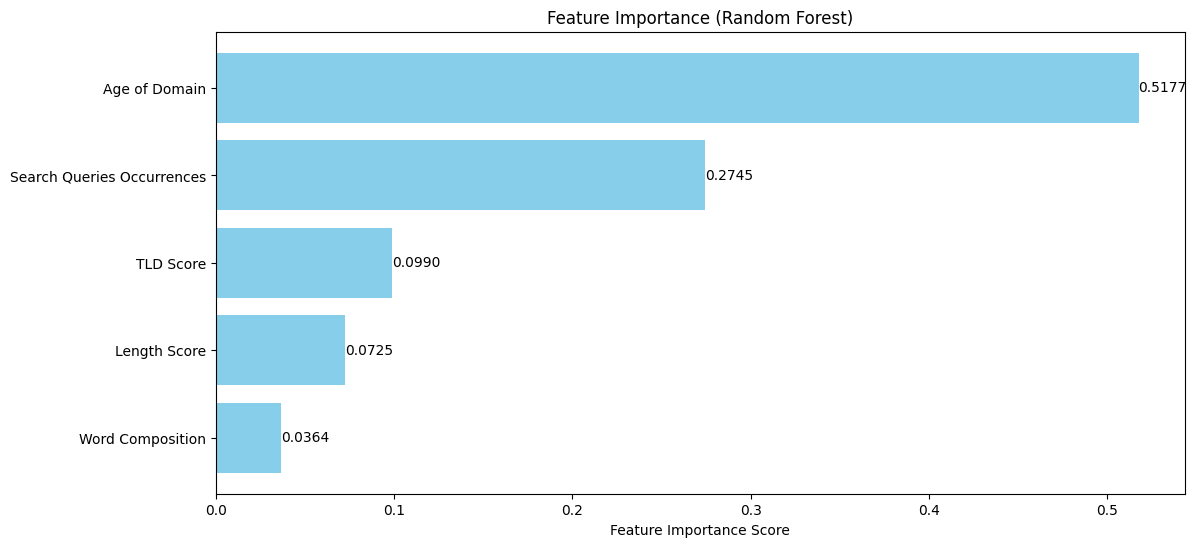

In [53]:
# Retrieve feature importance from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance 
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)

# Extract feature names and importance scores
features = [feature for feature, importance in sorted_features]
importance_scores = [importance for feature, importance in sorted_features]

# Create a horizontal bar chart
plt.figure(figsize=(12.5, 6))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance (Random Forest)')

# Add labels with scores on the bars
for index, value in enumerate(importance_scores):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center')

plt.show()

# Result Table

- Default model

In [54]:
#Table 4: Base Model Performance
data_table_1 = [
    ['Baseline Model', baseline_mae_log, baseline_rmse_log, baseline_mae_original, baseline_rmse_original,'N/A'],
    ['Random Forest', mae_log_rf, rmse_log_rf, mae_original_rf, rmse_original_rf,r2_rf],
    ['Gradient Boosting', mae_log_gd, rmse_log_gd, mae_original_gd, rmse_original_gd, r2_gd],
    ['XGBoost', mae_log_xgb, rmse_log_xgb, mae_original_xgb, rmse_original_xgb, r2_xgb]
]

headers_table_1 = ['Model', 'MAE (Log Scale)', 'RMSE (Log Scale)', 'MAE (Original Scale)', 'RMSE (Original Scale)' , 'R^2']
colalign = ['center'] * len(headers_table_1)
print("Table 1: Base Model Performance")
print(tabulate(data_table_1, headers=headers_table_1, tablefmt="grid", colalign=colalign))


Table 1: Base Model Performance
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|       Model       |  MAE (Log Scale)  |  RMSE (Log Scale)  |  MAE (Original Scale)  |  RMSE (Original Scale)  |  R^2   |
+===================+===================+====================+========================+=========================+========+
|  Baseline Model   |      0.8408       |       0.9896       |        1563.56         |         2406.53         |  N/A   |
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|   Random Forest   |      0.4797       |       0.6941       |        1070.24         |         2192.01         | 0.5075 |
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
| Gradient Boosting |      0.4521       |       0.6516       |        1003.08         |         2137.55    

- Hyperparameter tunned model

In [55]:
#Table 5: Tunned Model Performance
data_table_2 = [
    ['Random Forest', best_mae_log_rf, best_rmse_log_rf, best_mae_original_rf, best_rmse_original_rf, best_r2_rf ],
    ['Gradient Boosting', best_mae_log_gd, best_rmse_log_gd, best_mae_original_gd, best_rmse_original_gd, best_r2_gd],
    ['XGBoost', best_mae_log_xgb, best_rmse_log_xgb, best_mae_original_xgb, best_rmse_original_xgb, best_r2_xgb]
]

headers_table_2 = ['Model', 'MAE (Log Scale)', 'RMSE (Log Scale)', 'MAE (Original Scale)', 'RMSE (Original Scale)', 'R^2']
colalign = ['center'] * len(headers_table_2)
print("\nTable 2: Tunned Model Performance")
print(tabulate(data_table_2, headers=headers_table_1, tablefmt="grid", colalign=colalign))




Table 2: Tunned Model Performance
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|       Model       |  MAE (Log Scale)  |  RMSE (Log Scale)  |  MAE (Original Scale)  |  RMSE (Original Scale)  |  R^2   |
+===================+===================+====================+========================+=========================+========+
|   Random Forest   |      0.4426       |       0.6502       |        996.804         |         2137.1          | 0.5678 |
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
| Gradient Boosting |      0.4447       |       0.6507       |        996.913         |         2138.54         | 0.5672 |
+-------------------+-------------------+--------------------+------------------------+-------------------------+--------+
|      XGBoost      |      0.4474       |       0.6406       |        1000.67         |         2133.34 

- K-fold cross-validation results

In [56]:
# Table 6: K-Fold Cross Validation Performance
data_table_3 = [
    ['Random Forest', mean_cv_mae_rf, std_cv_mae_rf],
    ['Gradient Boosting', mean_cv_mae_gd, std_cv_mae_gd],
    ['XGBoost', mean_cv_mae_xgb, std_cv_mae_xgb]
]

headers_table_3 = ['Model', 'Mean CV MAE (Log Scale)', 'SD CV MAE (Log Scale)']
colalign = ['center'] * len(headers_table_3)
print("\nTable 3: K-Fold Cross Validation Performance")
print(tabulate(data_table_3, headers=headers_table_3, tablefmt="grid", colalign=colalign))


Table 3: K-Fold Cross Validation Performance
+-------------------+---------------------------+-------------------------+
|       Model       |  Mean CV MAE (Log Scale)  |  SD CV MAE (Log Scale)  |
+===================+===========================+=========================+
|   Random Forest   |          0.4676           |         0.0778          |
+-------------------+---------------------------+-------------------------+
| Gradient Boosting |          0.4783           |          0.082          |
+-------------------+---------------------------+-------------------------+
|      XGBoost      |          0.4748           |         0.0864          |
+-------------------+---------------------------+-------------------------+


# Comparison Graph

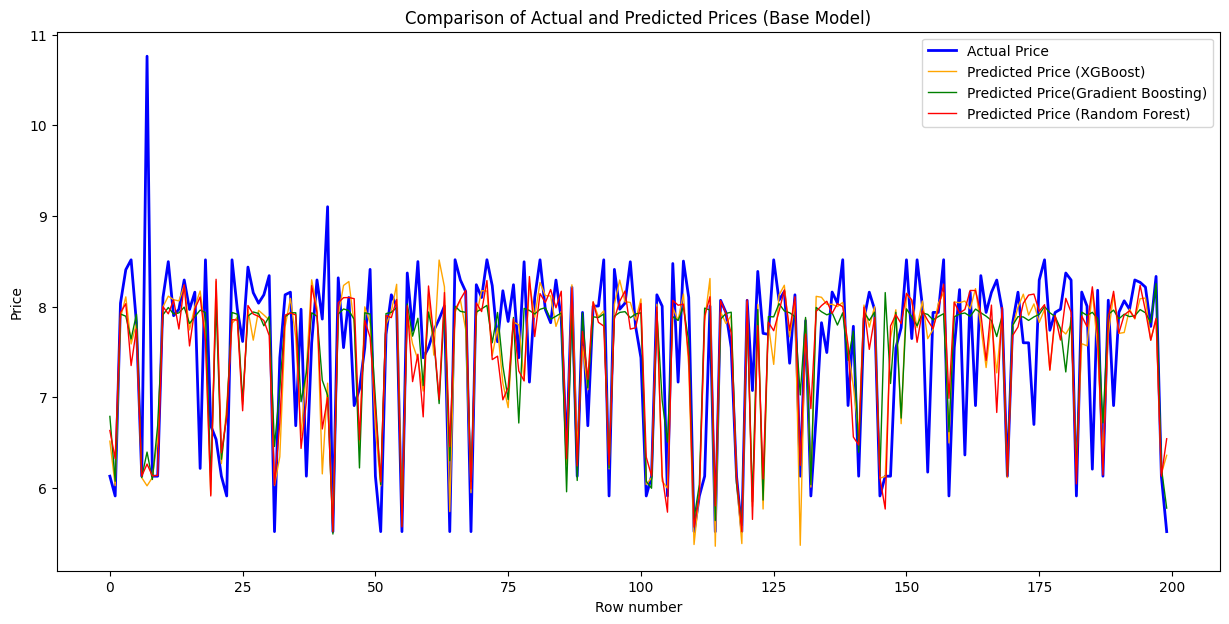

In [67]:
# Convert to DataFrame for easier handling
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price (XGBoost)': y_pred_xgb,
    'Predicted Price (Gradient Boosting)': y_pred_gd,
    'Predicted Price (Random Forest)': y_pred_rf
})

# Select a number of rows to display 
comparison_df_subset = comparison_df.head(200)

# Create the plot
plt.figure(figsize=(15, 7))
plt.plot(comparison_df_subset['Actual Price'].values, label='Actual Price', color='blue', linewidth=2)
plt.plot(comparison_df_subset['Predicted Price (XGBoost)'].values, label='Predicted Price (XGBoost)', color='orange', linewidth=1)
plt.plot(comparison_df_subset['Predicted Price (Gradient Boosting)'].values, label='Predicted Price(Gradient Boosting)', color='green', linewidth=1)
plt.plot(comparison_df_subset['Predicted Price (Random Forest)'].values, label='Predicted Price (Random Forest)', color='red', linewidth=1)
plt.title('Comparison of Actual and Predicted Prices (Base Model)')
plt.xlabel('Row number')
plt.ylabel('Price')
plt.legend()
plt.show()

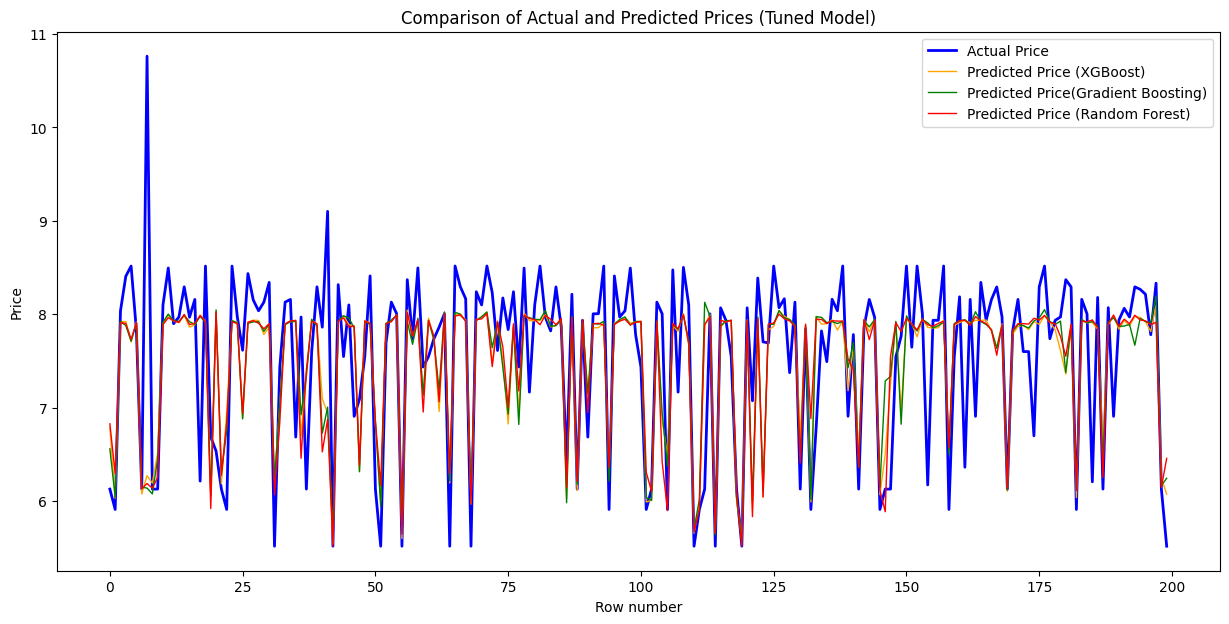

In [69]:
# Convert to DataFrame for easier handling
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price (XGBoost)': best_y_pred_xgb,
    'Predicted Price (Gradient Boosting)': best_y_pred_gd,
    'Predicted Price (Random Forest)': best_y_pred_rf
})

# Select a number of rows to display 
comparison_df_subset = comparison_df.head(200)

# Create the plot
plt.figure(figsize=(15, 7))
plt.plot(comparison_df_subset['Actual Price'].values, label='Actual Price', color='blue', linewidth=2)
plt.plot(comparison_df_subset['Predicted Price (XGBoost)'].values, label='Predicted Price (XGBoost)', color='orange', linewidth=1)
plt.plot(comparison_df_subset['Predicted Price (Gradient Boosting)'].values, label='Predicted Price(Gradient Boosting)', color='green', linewidth=1)
plt.plot(comparison_df_subset['Predicted Price (Random Forest)'].values, label='Predicted Price (Random Forest)', color='red', linewidth=1)
plt.title('Comparison of Actual and Predicted Prices (Tuned Model)')
plt.xlabel('Row number')
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
import joblib
deploy_model = best_estimator_rf
# Save the model to a file
joblib.dump(deploy_model, 'domain_rf_model.joblib')